# Hackathon 15-04-2023

In [1]:
import pandas as pd
import numpy as np

#Libraries for Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#For obtaining performance metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
sample.head()

,customer_id,Y
0,374679,0
1,469678,0
2,216140,0
3,184301,1
4,148720,0


In [4]:
train.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [5]:
test.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1


In [6]:
train.describe()

,customer_id,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,10147.000000,10147.000000,10147.000000,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000
mean,311272.276831,63.172366,0.412634,1.0,0.563024,0.119838,0.212181,0.787819,0.568444
std,106781.701016,19.232595,0.492332,0.0,0.496037,0.324788,0.408872,0.408872,0.495318
min,123472.000000,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221439.000000,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,310062.000000,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,401537.000000,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,499988.000000,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.describe(include='object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,84,10059,9975,10025,10050,9999
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Bachelors degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,5045,5802,8015,2576,3191,5643,5204,2133,4086,3511,1485,1622,18,4150,2696,3741,4296,4889


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [9]:
train.isnull().sum()

customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Since missing values in car is more the 30% we are dropping it

In [10]:
train.drop(axis = 1 , columns = ['car'], inplace = True)
test.drop(axis = 1, columns = ['car'], inplace = True)

In [11]:
train.Bar.fillna(train['Bar'].mode()[0], inplace = True)

In [12]:
train.CoffeeHouse.fillna(train['CoffeeHouse'].mode()[0], inplace = True)

In [13]:
train.CarryAway.fillna(train['CarryAway'].mode()[0], inplace = True)

In [14]:
train.Restaurant20To50.fillna(train['Restaurant20To50'].mode()[0], inplace = True)

In [15]:
train.RestaurantLessThan20.fillna(train['RestaurantLessThan20'].mode()[0], inplace = True)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           2537 non-null   int64 
 1   destination           2537 non-null   object
 2   passanger             2537 non-null   object
 3   weather               2537 non-null   object
 4   temperature           2537 non-null   int64 
 5   time                  2537 non-null   object
 6   coupon                2537 non-null   object
 7   expiration            2537 non-null   object
 8   gender                2537 non-null   object
 9   age                   2537 non-null   object
 10  maritalStatus         2537 non-null   object
 11  has_children          2537 non-null   int64 
 12  education             2537 non-null   object
 13  occupation            2537 non-null   object
 14  income                2537 non-null   object
 15  Bar                   2518 non-null   

In [17]:
test.isnull().sum()

customer_id              0
destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     19
CoffeeHouse             45
CarryAway               29
RestaurantLessThan20    33
Restaurant20To50        41
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
dtype: int64

In [18]:
test.Bar.fillna(test.Bar.mode()[0], inplace = True)
test.CoffeeHouse.fillna(test.CoffeeHouse.mode()[0], inplace = True)
test.CarryAway.fillna(test.CarryAway.mode()[0], inplace = True)
test.Restaurant20To50.fillna(test.Restaurant20To50.mode()[0], inplace = True)
test.RestaurantLessThan20.fillna(test.RestaurantLessThan20.mode()[0], inplace = True)

<AxesSubplot:>

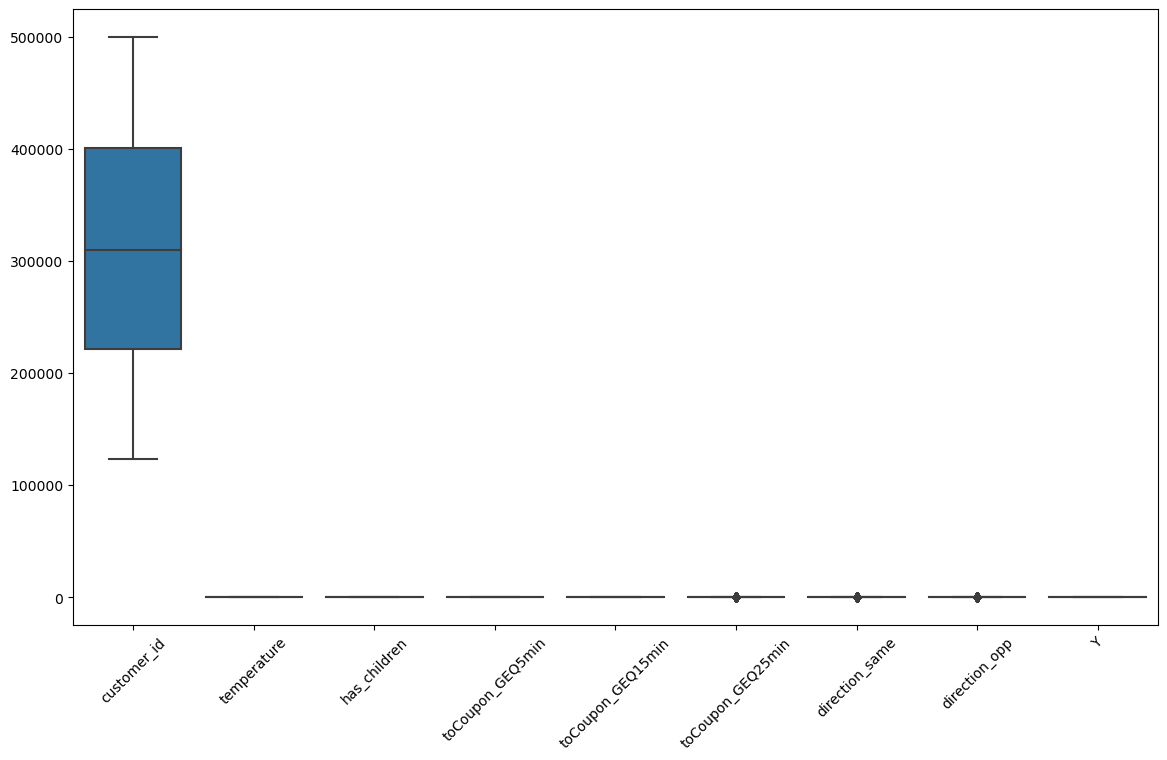

In [19]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.boxplot(data = train)

In [20]:
def detect_outlier(Data):
    # find q1 and q3 values
    q1 = np.percentile(sorted(Data), [25])
    q3 = np.percentile(sorted(Data), [75])
 
    # compute IRQ
    iqr = q3 - q1
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Data if x <= lower_bound or x >= upper_bound]
    return outliers

def remove_outlier(Data,column):
    outlier_list  = detect_outlier5(Data[column])
    Data.loc[Data[column].isin(outlier_list)] = Data[column].median()
    

In [21]:
detect_outlier(train.toCoupon_GEQ25min)[:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [22]:
train.toCoupon_GEQ25min.value_counts()

0    8931
1    1216
Name: toCoupon_GEQ25min, dtype: int64

Since in the features having outliers their value_counts is 0 and 1 there is actually no outliers here

In [23]:
for i in train.columns:
    if train[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train[i].unique())
        print()

destination: 
 ['No Urgent Place' 'Work' 'Home']

passanger: 
 ['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

weather: 
 ['Sunny' 'Rainy' 'Snowy']

time: 
 ['6PM' '7AM' '10AM' '10PM' '2PM']

coupon: 
 ['Restaurant(<20)' 'Coffee House' 'Restaurant(20-50)' 'Bar'
 'Carry out & Take away']

expiration: 
 ['1d' '2h']

gender: 
 ['Male' 'Female']

age: 
 ['21' '26' '31' '50plus' '36' '41' '46' 'below21']

maritalStatus: 
 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

education: 
 ['Some college - no degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'Associates degree'
 'High School Graduate' 'Some High School']

occupation: 
 ['Student' 'Computer & Mathematical' 'Unemployed' 'Healthcare Support'
 'Retired' 'Food Preparation & Serving Related' 'Sales & Related'
 'Architecture & Engineering' 'Education&Training&Library'
 'Arts Design Entertainment Sports & Media' 'Management'
 'Community & Social Services' 'Life Physical Social Science'
 'Transportation &

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 3000x1400 with 0 Axes>

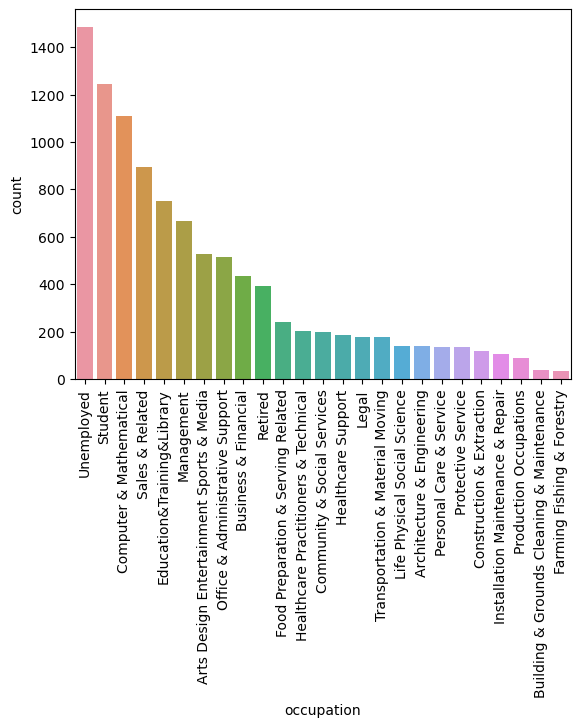

<Figure size 3000x1400 with 0 Axes>

In [24]:
chart = sns.countplot(train['occupation'], order = train['occupation'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.figure(figsize=(30,14))

Category of people who come to malls are mostly Students and Unemployed people

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 3000x1400 with 0 Axes>

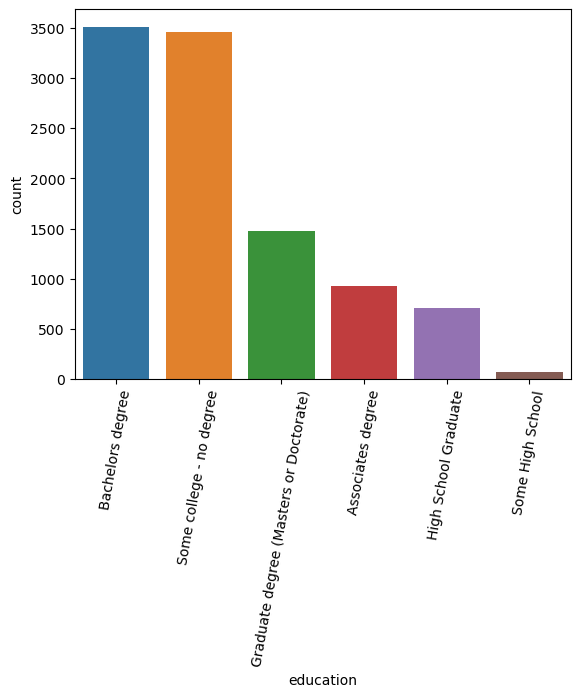

<Figure size 3000x1400 with 0 Axes>

In [25]:
chart = sns.countplot(train['education'], order = train['education'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=80)
plt.figure(figsize=(30,14))

Usually people having completed high school tend to come to malls

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 3000x1400 with 0 Axes>

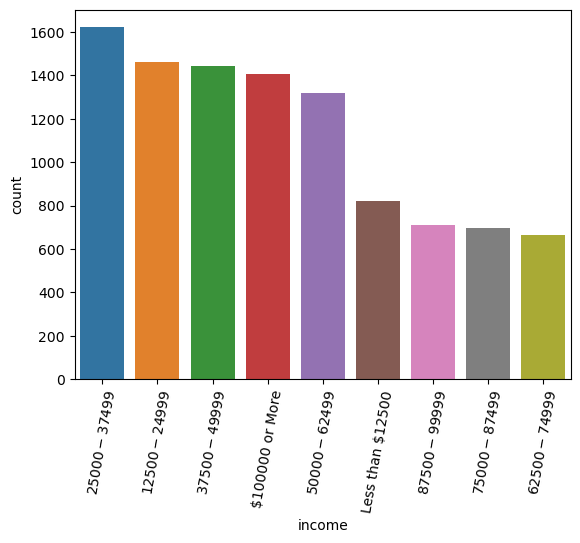

<Figure size 3000x1400 with 0 Axes>

In [26]:
chart = sns.countplot(train['income'], order = train['income'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=80)
plt.figure(figsize=(30,14))

People in mid range of income don't visit the mall often (Mid range being 62500-99999)

<AxesSubplot:xlabel='count', ylabel='occupation'>

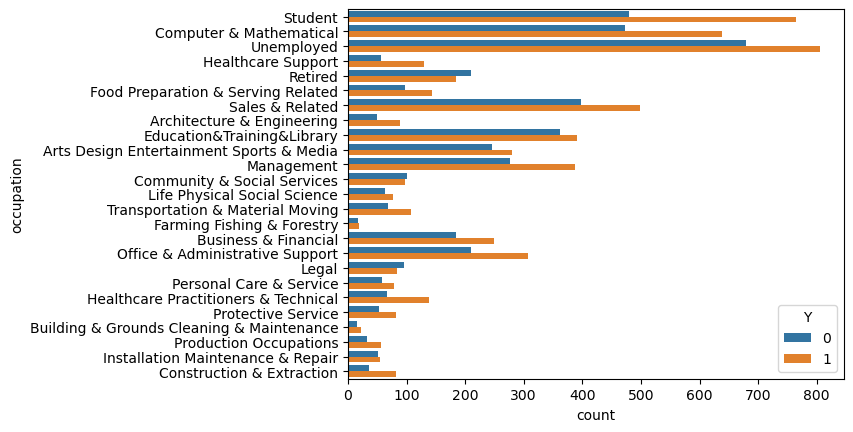

In [27]:
sns.countplot(y = train.occupation, hue = train.Y)

Most of the discounts availed are by Students and Unemployed people followed by Computer and Maths which can be taken as top 3.

<AxesSubplot:xlabel='count', ylabel='education'>

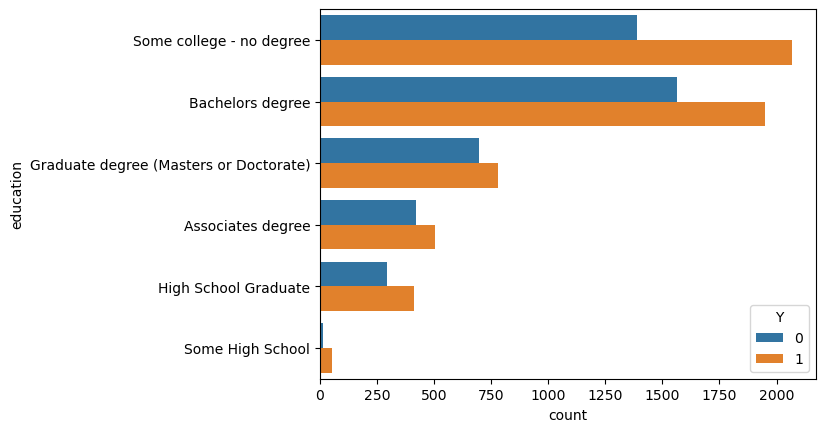

In [28]:
sns.countplot(y = train.education, hue = train.Y)

Regardless of Education level most of the people are responding as yes for the discount.

<AxesSubplot:xlabel='count', ylabel='age'>

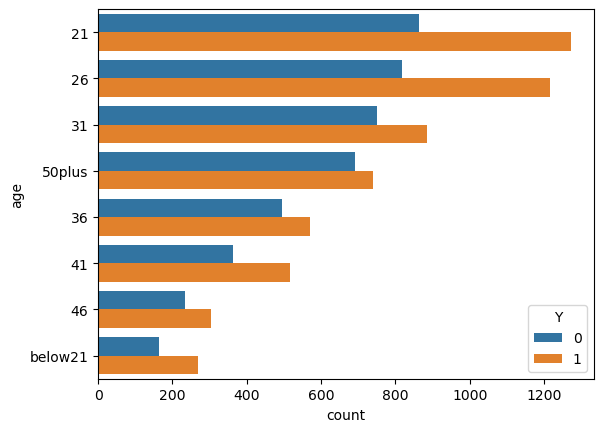

In [29]:
sns.countplot(y = train.age, hue = train.Y)

Most discount availers are within the age group 21 - 31 and 50 plus range. Also regardless of age most people are availing the discounts

<AxesSubplot:xlabel='count', ylabel='age'>

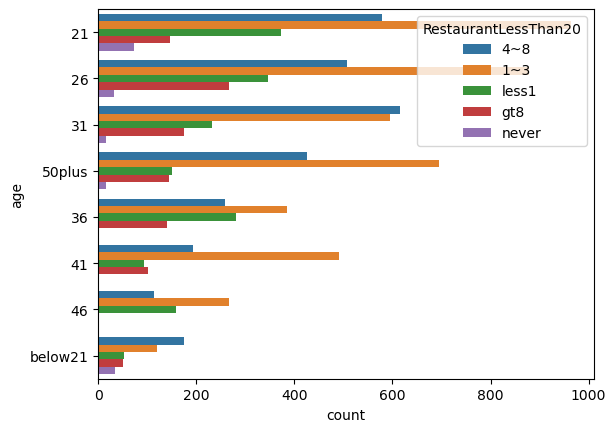

In [80]:
sns.countplot(y = train.age, hue = train.RestaurantLessThan20)

All age groups mostly go to the restaurant with <20$ per person 1-3 times in a month

<AxesSubplot:xlabel='count', ylabel='RestaurantLessThan20'>

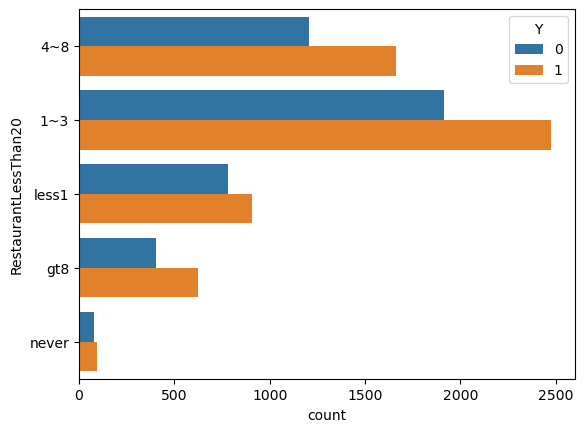

In [30]:
sns.countplot(y = train.RestaurantLessThan20, hue = train.Y)

Most people always go to restaurants and even if some people never go to restaurants they still take the discount

<AxesSubplot:xlabel='count', ylabel='income'>

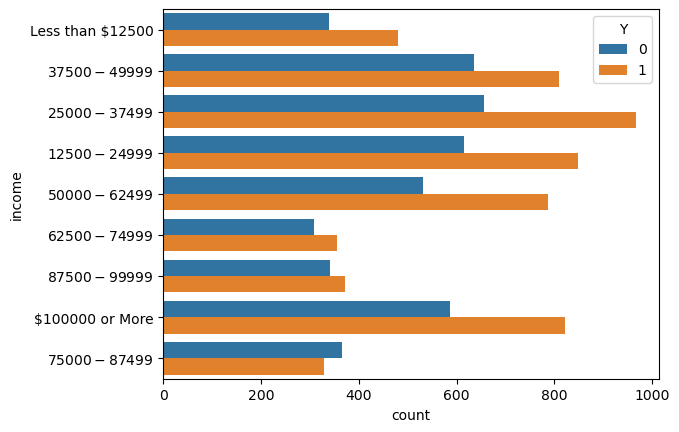

In [31]:
sns.countplot(y = train.income, hue = train.Y)

Not sure about what to infer from this plot

<AxesSubplot:xlabel='count', ylabel='coupon'>

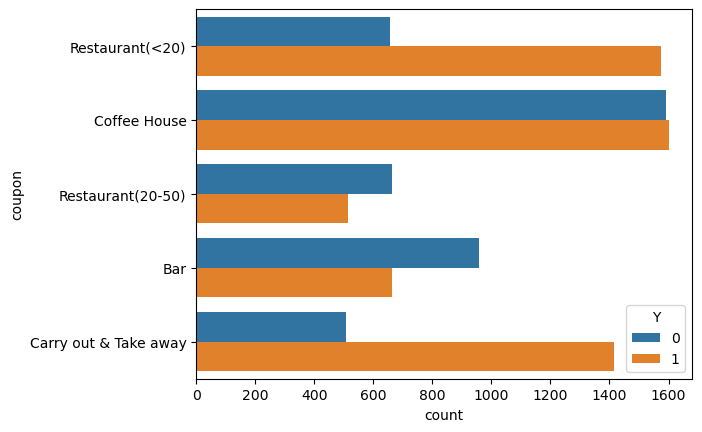

In [32]:
sns.countplot(y = train.coupon, hue = train.Y)

People generally take the Carry out and Take away, Coffee House and Restaurant < 20 $ coupons with least rejection being of Carry out & take away

<AxesSubplot:xlabel='count', ylabel='maritalStatus'>

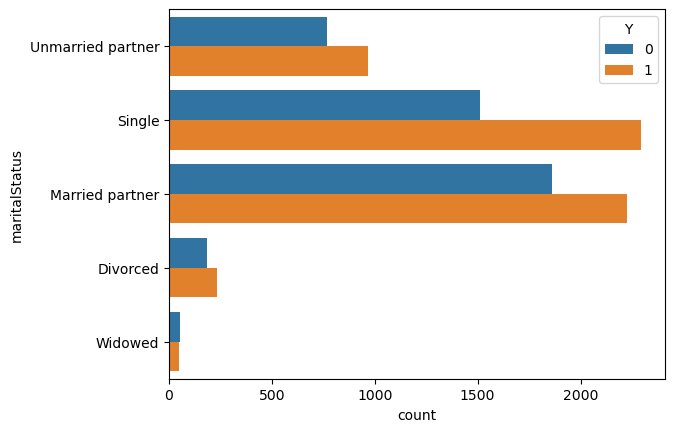

In [33]:
sns.countplot(y = train.maritalStatus, hue = train.Y)

Most of the people availing discounts are either married ones or single people.

<AxesSubplot:xlabel='count', ylabel='maritalStatus'>

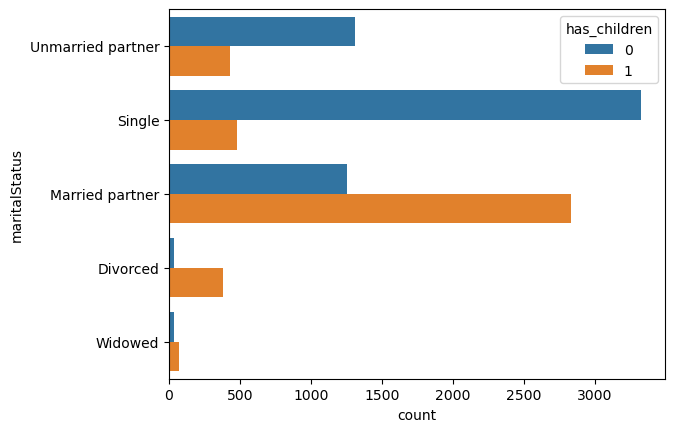

In [34]:
sns.countplot(y = train.maritalStatus, hue = train.has_children)

This is kind of a given, Married partners will have the highest probability of having children

<AxesSubplot:xlabel='count', ylabel='gender'>

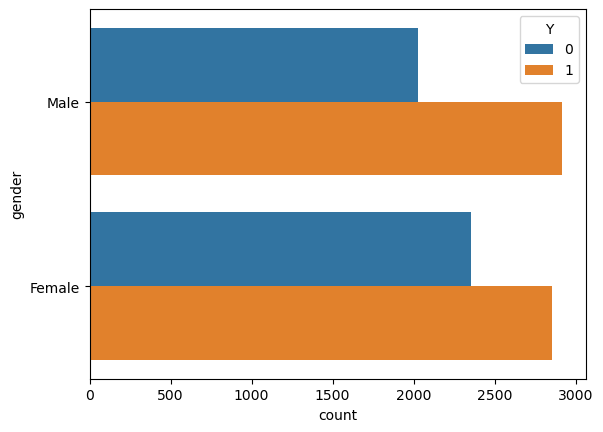

In [35]:
sns.countplot(y = train.gender, hue = train.Y)

No matter the gender a person mostly avails discounts. Judging from this plot we can say males tend to reject discounts less than females

<AxesSubplot:xlabel='count', ylabel='toCoupon_GEQ15min'>

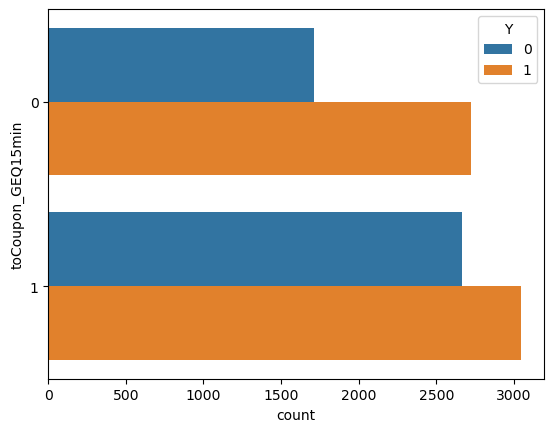

In [36]:
sns.countplot(y = train.toCoupon_GEQ15min, hue = train.Y)

People are more likely to avail discount if distance to the restaurant from their destination is <15 mins

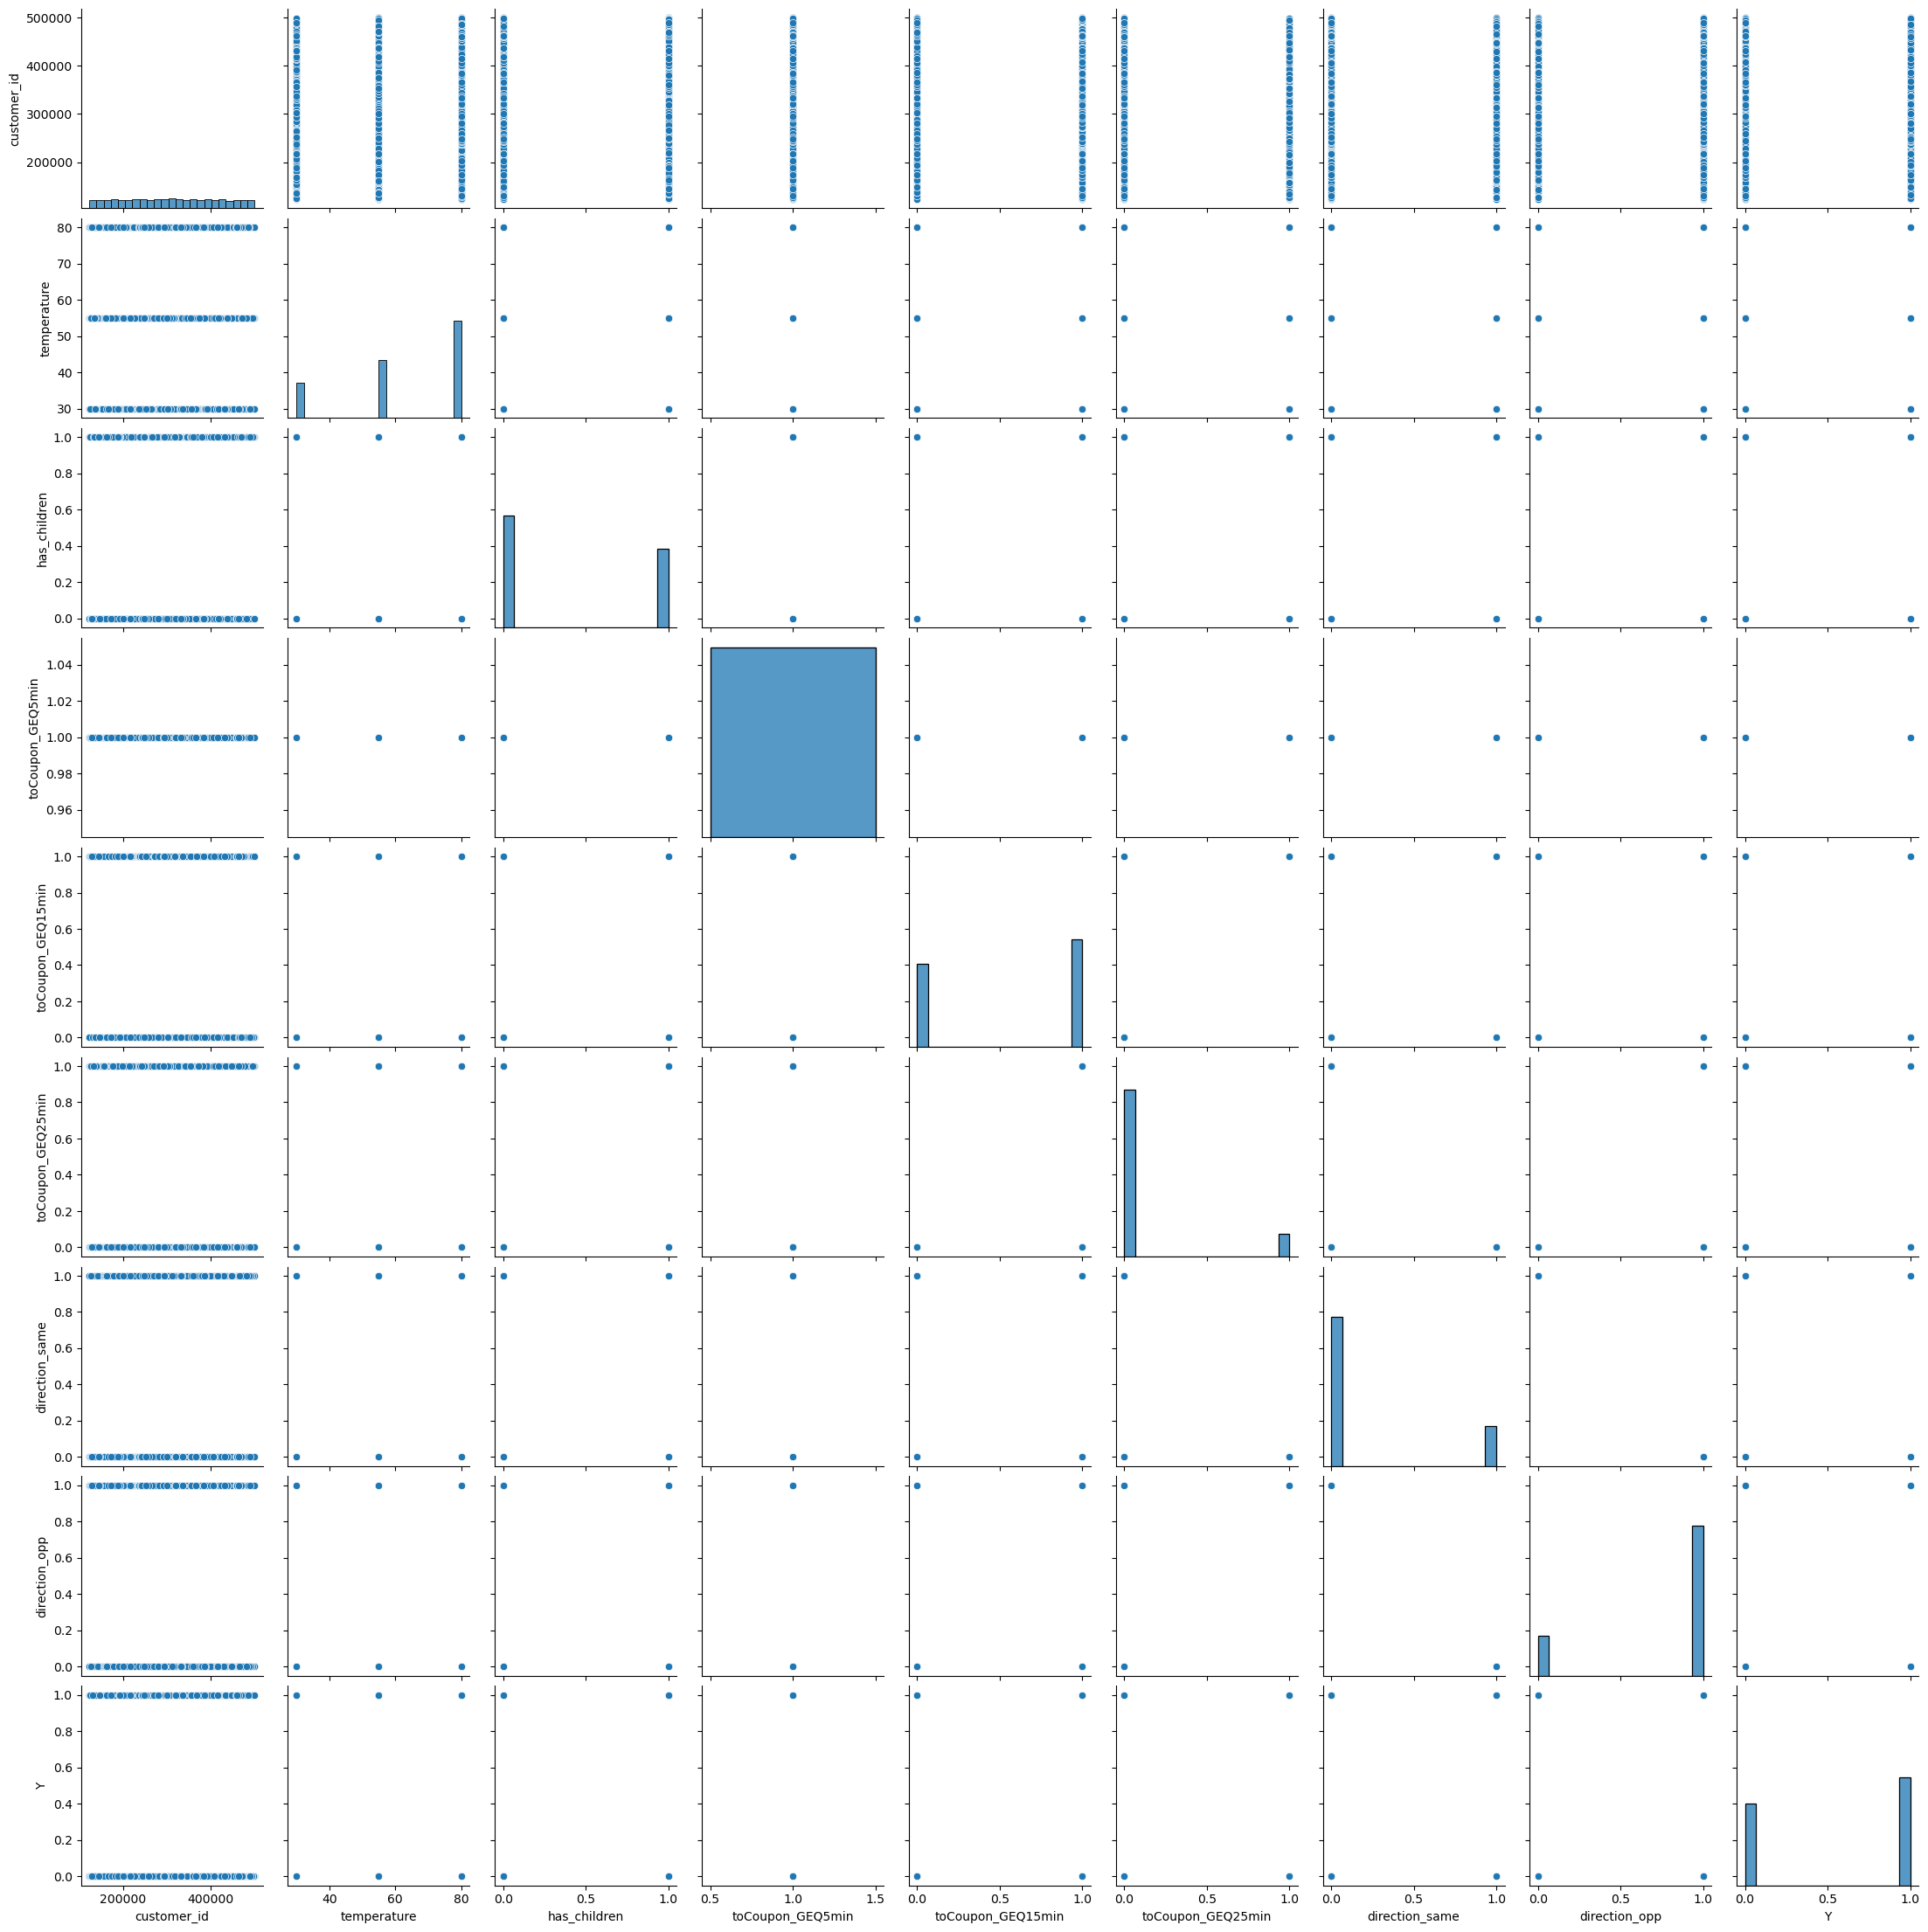

In [37]:
sns.pairplot(train)

(array([4434.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5713.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

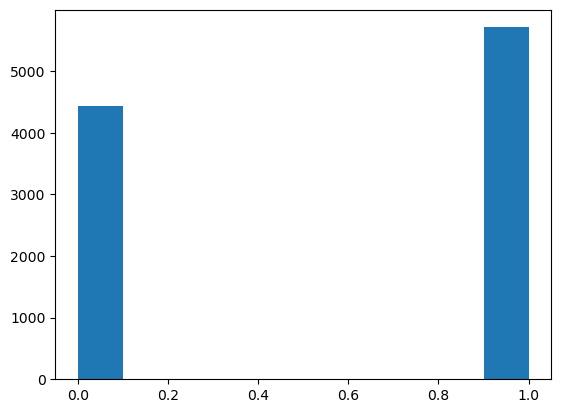

In [38]:
plt.hist(x = train.toCoupon_GEQ15min)

<AxesSubplot:xlabel='count', ylabel='expiration'>

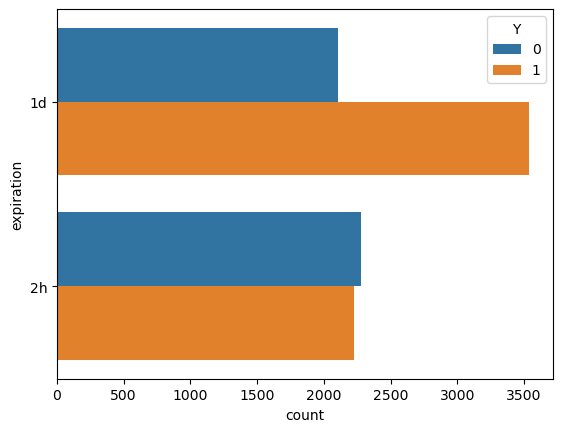

In [39]:
sns.countplot(y = train.expiration, hue = train.Y)

<AxesSubplot:xlabel='count', ylabel='time'>

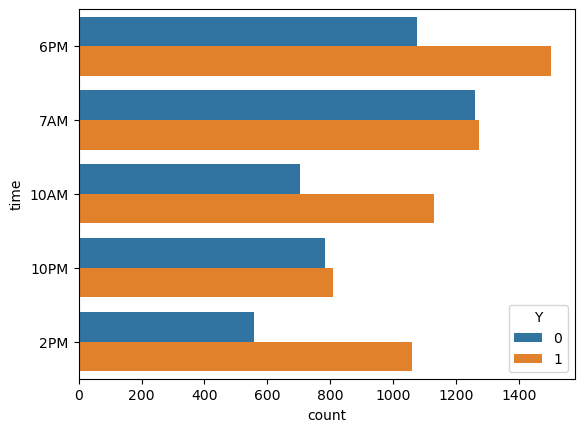

In [40]:
sns.countplot(y = train.time, hue = train.Y)

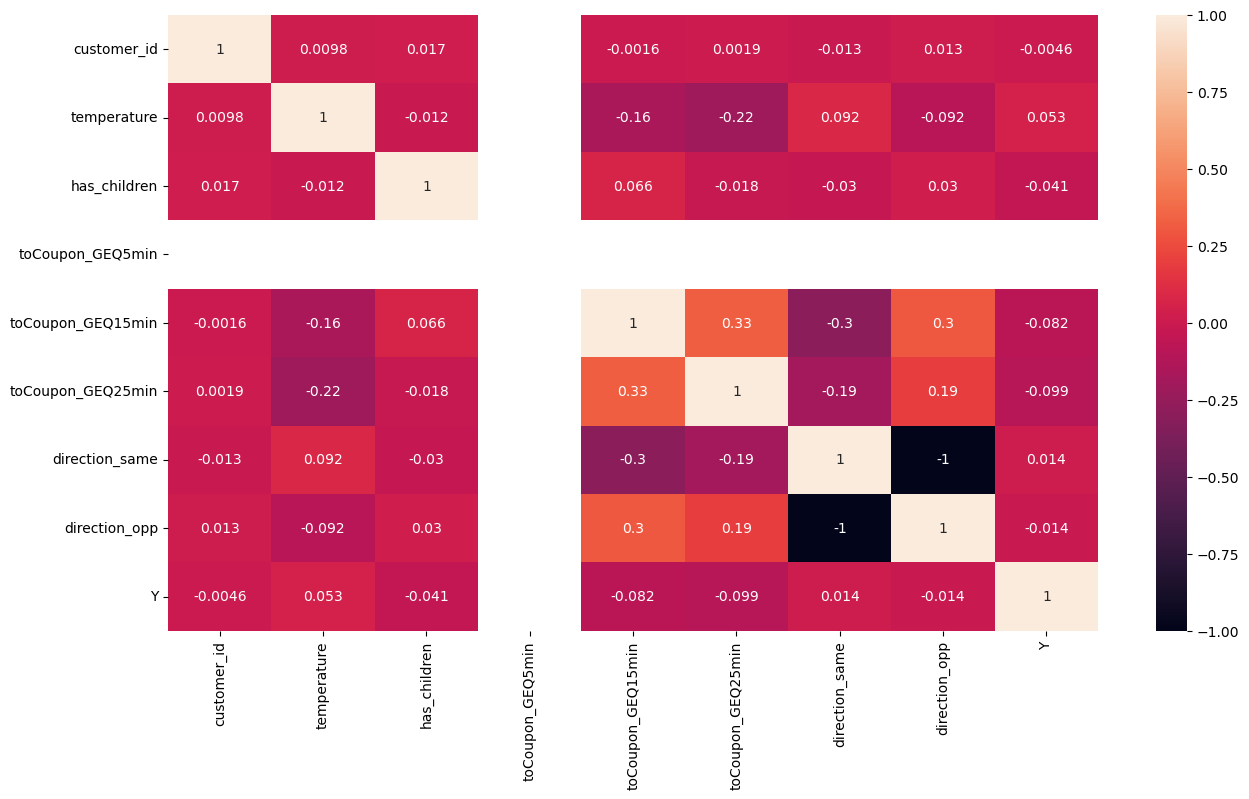

In [41]:
corr = train.corr()

#Setting the size of the figure
plt.figure(figsize =(15,8))

#Plot the correlation using heatmap
ax = sns.heatmap(corr, annot=True)

In [42]:
X = train.drop(axis = 1, columns = ['weather','occupation','customer_id','temperature','passanger','Y','gender','has_children','direction_opp','income'])
X

,destination,time,coupon,expiration,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,No Urgent Place,6PM,Restaurant(<20),1d,21,Unmarried partner,Some college - no degree,less1,1~3,4~8,4~8,never,1,1,0,0
1,Work,7AM,Restaurant(<20),2h,21,Single,Bachelors degree,less1,1~3,4~8,1~3,less1,1,0,0,1
2,No Urgent Place,10AM,Coffee House,2h,21,Married partner,Some college - no degree,less1,gt8,4~8,1~3,1~3,1,1,0,0
3,Work,7AM,Restaurant(<20),2h,26,Single,Bachelors degree,less1,less1,4~8,1~3,never,1,1,1,0
4,Home,6PM,Coffee House,1d,31,Single,Some college - no degree,1~3,less1,4~8,less1,never,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,Home,6PM,Carry out & Take away,2h,below21,Single,Some college - no degree,never,gt8,gt8,gt8,less1,1,1,0,1
10143,Home,6PM,Coffee House,1d,26,Married partner,Bachelors degree,never,less1,1~3,1~3,less1,1,0,0,1
10144,No Urgent Place,10AM,Restaurant(<20),2h,21,Unmarried partner,Some college - no degree,never,never,1~3,never,never,1,0,0,0
10145,No Urgent Place,10PM,Restaurant(20-50),2h,46,Married partner,Bachelors degree,less1,never,1~3,1~3,1~3,1,0,0,0


In [43]:
#X = pd.get_dummies(X)
#X
columns_to_or = ["time","coupon" ,'expiration','education',"Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]
#Label Encoding the categorical columns
for col in columns_to_or:
    ore = OrdinalEncoder()
    X[col] = ore.fit_transform(np.asarray(X[col]).reshape(-1,1))

In [44]:
y = train['Y']
y

0        1
1        0
2        0
3        0
4        0
        ..
10142    0
10143    1
10144    1
10145    0
10146    0
Name: Y, Length: 10147, dtype: int64

In [45]:
columns_to_nom = ["destination","age","maritalStatus"]
#OHE  Nominal categorical columns
oh = OneHotEncoder(handle_unknown='ignore',sparse=False)
for col in columns_to_nom:
    X[col]  = oh.fit_transform(np.asarray(X[col]).reshape(-1, 1))

C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
cnames = ["toCoupon_GEQ15min","toCoupon_GEQ25min","direction_same","toCoupon_GEQ5min"]

sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[[col]])

In [47]:
X

,destination,time,coupon,expiration,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,4.0,0.0,5.0,3.0,0.0,0.880979,-0.368992,-0.518967
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,1.0,1.0,3.0,0.0,-1.135100,-0.368992,1.926904
2,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0,0.0,0.880979,-0.368992,-0.518967
3,3.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,1.0,1.0,3.0,0.0,0.880979,2.710087,-0.518967
4,3.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,5.0,0.0,0.0,0.880979,-0.368992,-0.518967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,2.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,1.0,1.0,5.0,4.0,0.0,0.880979,-0.368992,1.926904
10143,3.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,4.0,0.0,-1.135100,-0.368992,1.926904
10144,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,4.0,0.0,-1.135100,-0.368992,-0.518967
10145,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,-1.135100,-0.368992,-0.518967


In [48]:
for i in test.columns:
    if test[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test[i].unique())
        print()

destination: 
 ['No Urgent Place' 'Home' 'Work']

passanger: 
 ['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

weather: 
 ['Sunny' 'Rainy' 'Snowy']

time: 
 ['6PM' '10AM' '7AM' '10PM' '2PM']

coupon: 
 ['Coffee House' 'Carry out & Take away' 'Bar' 'Restaurant(<20)'
 'Restaurant(20-50)']

expiration: 
 ['1d' '2h']

gender: 
 ['Female' 'Male']

age: 
 ['below21' '21' '26' '50plus' '46' '31' '36' '41']

maritalStatus: 
 ['Single' 'Unmarried partner' 'Married partner' 'Divorced' 'Widowed']

education: 
 ['Some college - no degree' 'High School Graduate' 'Associates degree'
 'Bachelors degree' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation: 
 ['Healthcare Support' 'Food Preparation & Serving Related' 'Unemployed'
 'Retired' 'Office & Administrative Support' 'Protective Service'
 'Transportation & Material Moving' 'Business & Financial'
 'Computer & Mathematical' 'Life Physical Social Science' 'Student'
 'Sales & Related' 'Healthcare Practitioners & Technical' 'Legal'
 '

In [49]:
test_new = test.drop(axis = 1, columns = ['weather','customer_id','occupation','temperature','gender','has_children','direction_opp','income','passanger'])
test_new

,destination,time,coupon,expiration,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,No Urgent Place,6PM,Coffee House,1d,below21,Single,Some college - no degree,never,1~3,less1,4~8,less1,1,0,0,0
1,Home,6PM,Carry out & Take away,2h,21,Unmarried partner,High School Graduate,1~3,never,gt8,4~8,1~3,1,1,0,1
2,No Urgent Place,10AM,Coffee House,1d,26,Married partner,Some college - no degree,never,never,1~3,less1,never,1,1,0,0
3,No Urgent Place,6PM,Bar,1d,50plus,Unmarried partner,Associates degree,never,4~8,4~8,1~3,less1,1,1,0,0
4,Work,7AM,Carry out & Take away,1d,26,Married partner,Some college - no degree,never,never,1~3,4~8,less1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,No Urgent Place,2PM,Coffee House,1d,26,Married partner,Bachelors degree,never,never,less1,less1,less1,1,0,0,0
2533,No Urgent Place,10AM,Carry out & Take away,2h,36,Married partner,Some college - no degree,less1,1~3,4~8,1~3,1~3,1,1,0,0
2534,Work,7AM,Coffee House,2h,31,Married partner,Some college - no degree,less1,less1,gt8,4~8,less1,1,1,1,0
2535,Home,10PM,Restaurant(20-50),2h,31,Married partner,Associates degree,never,1~3,1~3,1~3,1~3,1,1,0,0


In [50]:
columns_to_or = ["time","coupon" ,'education',"Bar","expiration","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]
#Label Encoding the categorical columns
for col in columns_to_or:
    ore = OrdinalEncoder()
    test_new[col] = ore.fit_transform(np.asarray(test_new[col]).reshape(-1,1))

In [51]:
columns_to_nom = ["destination","age","maritalStatus"]
#OHE  Nominal categorical columns
oh = OneHotEncoder(handle_unknown='ignore',sparse=False)
for col in columns_to_nom:
    test_new[col]  = oh.fit_transform(np.asarray(test_new[col]).reshape(-1, 1))

C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\91789\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
correlation = X.corr()
print(correlation['destination'].sort_values(ascending = False),"\n")

destination             1.000000
Restaurant20To50        0.162999
age                     0.111005
education               0.103096
direction_same          0.020196
maritalStatus           0.015794
RestaurantLessThan20    0.012523
time                    0.007450
toCoupon_GEQ25min       0.002249
CoffeeHouse             0.000010
toCoupon_GEQ15min      -0.001417
Bar                    -0.001900
expiration             -0.007161
CarryAway              -0.016767
coupon                 -0.029591
toCoupon_GEQ5min             NaN
Name: destination, dtype: float64 



In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100, stratify = y)

In [54]:
logreg = LogisticRegression(max_iter=200)

In [55]:
X.toCoupon_GEQ5min.isnull().sum()

0

In [56]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.6364532019704433

In [59]:
dectree = DecisionTreeClassifier(random_state = 0)

In [60]:
params = {'max_depth':list(range(2,5)), 'criterion':['gini', 'entropy'],'min_samples_split' :[2,5,10],'min_samples_leaf':[2,4]}
params

{'max_depth': [2, 3, 4],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [2, 4]}

In [61]:
cv_gs_dt = GridSearchCV(dectree, param_grid = params, cv = 5, scoring = 'accuracy')

In [62]:
cv_gs_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [63]:
print(cv_gs_dt.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [64]:
cv_gs_dt.best_score_

0.6698109841313894

In [65]:
dectree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 2,min_samples_split=2,
                                 random_state = 0)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

In [66]:
y_predict_dectree = dectree.predict(X_test)

In [67]:
acc_dectree = accuracy_score(y_test,y_predict_dectree)
acc_dectree

0.6784893267651888

In [72]:
clf = RandomForestClassifier() 

#from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier()


clf.fit(X,y)
y_pred_randF = clf.predict(X_test)




In [74]:
performance = pd.DataFrame({'Model':[dectree,logreg,clf],'Performance':[accuracy_score(y_test,y_predict_dectree),accuracy_score(y_test,y_pred), \
                                                                       accuracy_score(y_test,y_pred_randF)]})
performance

,Model,Performance
0,"DecisionTreeClassifier(max_depth=4, min_sample...",0.678489
1,LogisticRegression(max_iter=200),0.636453
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.953366


In [75]:
test

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,356045,No Urgent Place,Kid(s),Sunny,80,2PM,Coffee House,1d,Female,26,...,never,never,less1,less1,less1,1,0,0,0,1
2533,498759,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Male,36,...,less1,1~3,4~8,1~3,1~3,1,1,0,0,1
2534,356159,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,31,...,less1,less1,gt8,4~8,less1,1,1,1,0,1
2535,218541,Home,Kid(s),Snowy,30,10PM,Restaurant(20-50),2h,Female,31,...,never,1~3,1~3,1~3,1~3,1,1,0,0,1


In [76]:
y_pred_new = clf.predict(test_new)

In [77]:
y_pred_new

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [78]:
submit = pd.DataFrame({'customer_id':test.customer_id,'Y':y_pred_new})
submit

,customer_id,Y
0,374679,1
1,469678,1
2,216140,0
3,184301,0
4,148720,1
...,...,...
2532,356045,0
2533,498759,1
2534,356159,0
2535,218541,1


In [2040]:
submit.Y.value_counts()

1    1632
0     905
Name: Y, dtype: int64

In [2041]:
sample

,customer_id,Y
0,374679,0
1,469678,0
2,216140,0
3,184301,1
4,148720,0
...,...,...
2532,356045,1
2533,498759,0
2534,356159,0
2535,218541,0


In [79]:
submit.to_csv('submission4.csv', index=False)